In [56]:
###### Importing of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
##### Getting the data ---
def read_data():
    data = pd.read_csv("C:/Data Science/Nov 2023/5 Nov 2023/KNN Assignment/iphone_purchase_records.csv")
    return data


In [58]:
##### Calling the read Data Function
df = read_data()
print(df.head())
print(df.info())
print(df.shape)

   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None
(400, 4)


In [59]:
#### Preprocessing and Feature Enginneering
    df1 = df.copy()
print(df1)

     Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]


In [60]:
#### Exploratory Data Analysis
df1["Purchase Iphone"].value_counts()

0    257
1    143
Name: Purchase Iphone, dtype: int64

In [61]:
df1["Age"].value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

In [62]:
df1["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [63]:
df1["Salary"].value_counts()

72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: Salary, Length: 117, dtype: int64

<Axes: xlabel='Age', ylabel='Salary'>

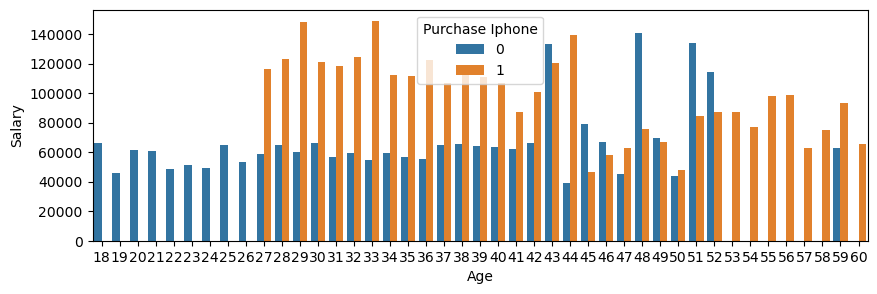

In [64]:
plt.figure(figsize=(10,3))
sns.barplot(x = 'Age', y = 'Salary' ,hue = 'Purchase Iphone' ,data = df1.sort_values(by = 'Salary',ascending=False),errorbar=None)

In [65]:
df1.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [66]:
df1.sort_values(by = 'Salary',ascending= False)

,Gender,Age,Salary,Purchase Iphone
211,Male,52,150000,1
7,Female,32,150000,1
103,Female,33,149000,1
240,Male,42,149000,1
168,Male,29,148000,1
...,...,...,...,...
32,Female,21,16000,0
150,Female,26,15000,0
43,Male,30,15000,0
92,Male,26,15000,0


<Figure size 1000x300 with 0 Axes>

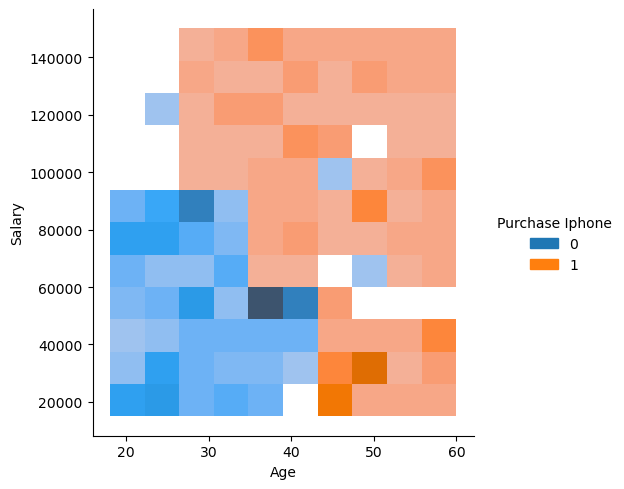

In [67]:
plt.figure(figsize=(10,3))
sns.displot(x = 'Age', y = 'Salary' ,hue = 'Purchase Iphone' ,data = df1.sort_values(by = 'Salary',ascending=False))

<Axes: xlabel='Age', ylabel='Salary'>

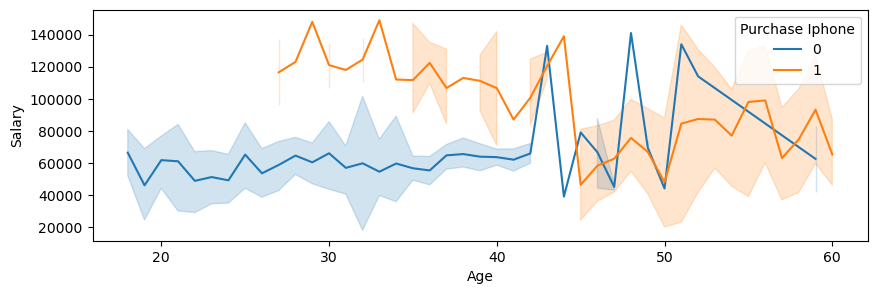

In [68]:
plt.figure(figsize=(10,3))
sns.lineplot(x = 'Age', y = 'Salary' ,hue = 'Purchase Iphone' ,data = df1)

<Axes: xlabel='Age', ylabel='Salary'>

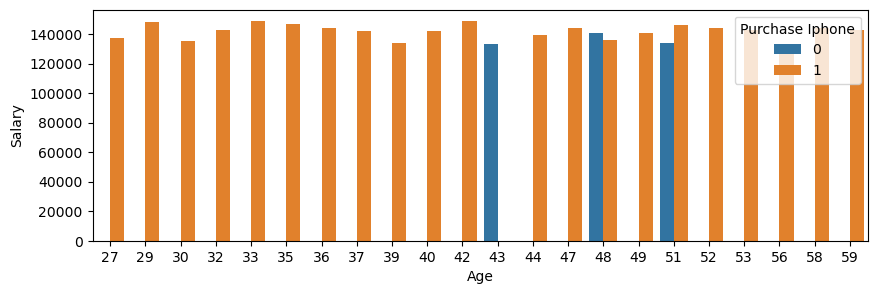

In [116]:
plt.figure(figsize=(10,3))
sns.barplot(x = 'Age', y = 'Salary' ,data = df1.sort_values(by = 'Salary',ascending=False).head(30),hue = 'Purchase Iphone',errorbar=None)

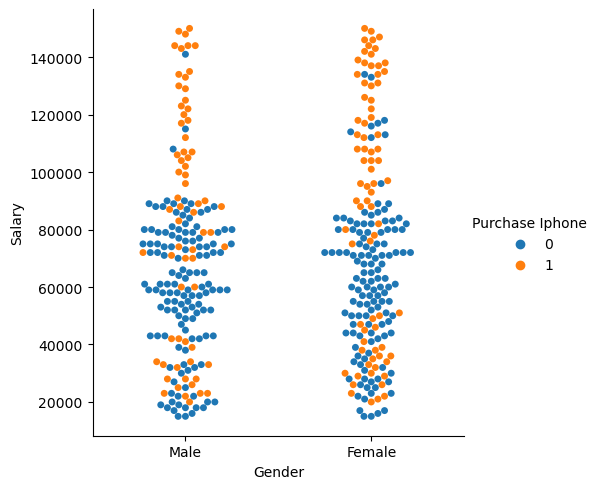

In [70]:
sns.catplot(data=df1, x="Gender", y="Salary", hue="Purchase Iphone", kind="swarm")

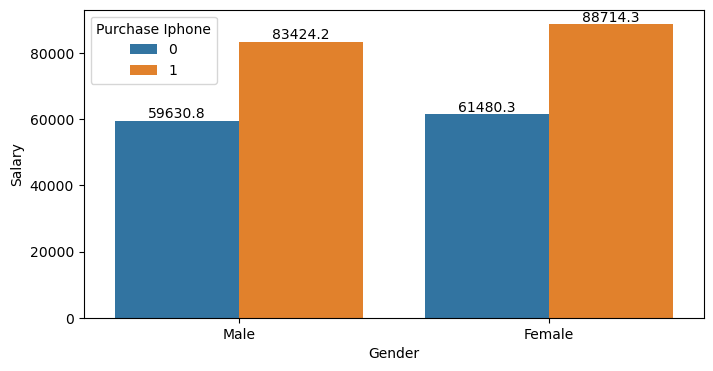

In [71]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df1, x="Gender", y="Salary", hue="Purchase Iphone",errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

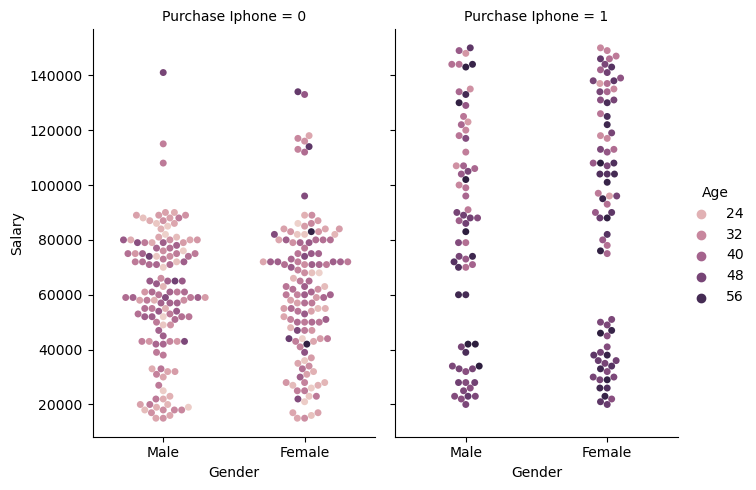

In [72]:
sns.catplot(
    data=df1, x="Gender", y="Salary", hue="Age",
    kind="swarm", col="Purchase Iphone", aspect=.7,
)

<Axes: xlabel='Age', ylabel='Salary'>

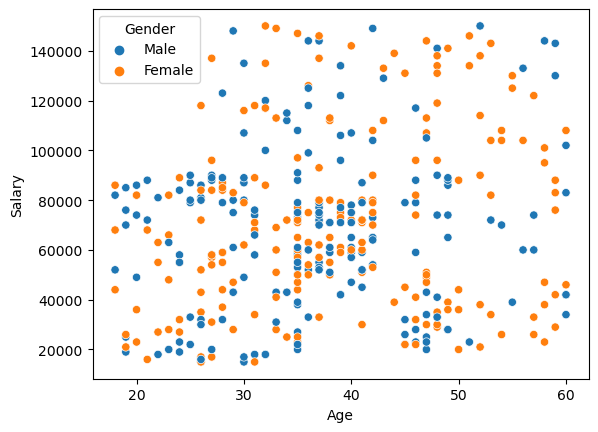

In [73]:
sns.scatterplot(x = 'Age',y = 'Salary',hue = 'Gender',data = df1)

<Axes: xlabel='Salary', ylabel='Age'>

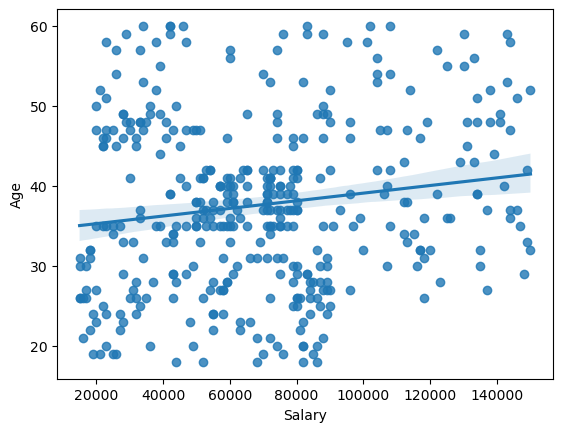

In [74]:
sns.regplot(x = 'Salary',y = 'Age',data = df1)

In [75]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

0.23133746309642822
count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64


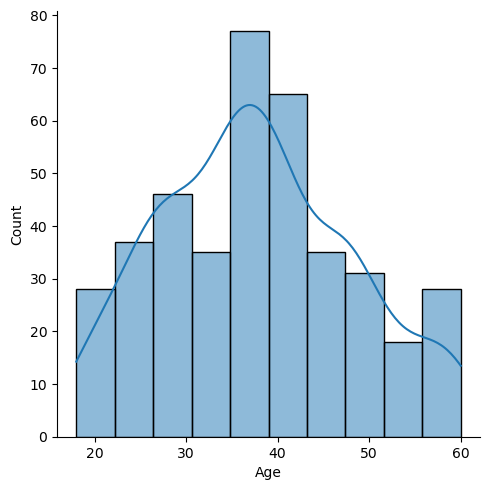

In [76]:
sns.displot(x = df1['Age'],kde = True)
print(df1['Age'].skew())
print(df1['Age'].describe())

0.49502362888993623
count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: Salary, dtype: float64


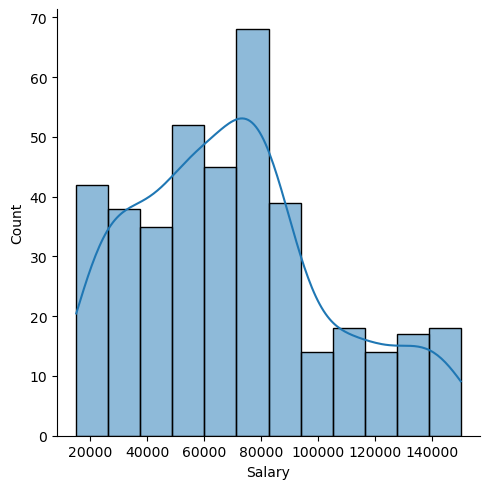

In [77]:
sns.displot(x = df1['Salary'],kde = True)
print(df1['Salary'].skew())
print(df1['Salary'].describe())

In [78]:
print(df1[['Salary','Age']].var())

Salary    1.162603e+09
Age       1.098907e+02
dtype: float64


In [94]:
y = df1['Purchase Iphone']
X = df1[['Age', 'Salary']]

In [95]:
df1.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [96]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=123)

In [106]:
from math import sqrt

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
clf = KNeighborsClassifier(n_neighbors=19)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [109]:
pred = clf.predict(X_test)
print(pred)

[1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0]


In [110]:
y_test

234    0
42     0
303    1
155    0
342    0
      ..
103    1
149    0
139    0
67     0
3      0
Name: Purchase Iphone, Length: 320, dtype: int64

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [114]:
print("The Accurancy Score is",accuracy_score(y_test,pred))

The Accurancy Score is 0.778125


<Axes: >

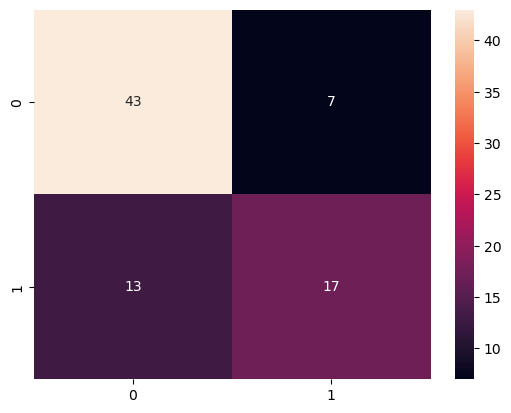

In [90]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [91]:
##### Error method// Also called as Elbow Method
error = []
for i in range(1,31):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test,predict_i))

In [92]:
print(error)

[0.19999999999999996, 0.23750000000000004, 0.19999999999999996, 0.2875, 0.22499999999999998, 0.23750000000000004, 0.23750000000000004, 0.275, 0.25, 0.25, 0.23750000000000004, 0.23750000000000004, 0.23750000000000004, 0.23750000000000004, 0.26249999999999996, 0.26249999999999996, 0.23750000000000004, 0.26249999999999996, 0.25, 0.25, 0.275, 0.26249999999999996, 0.25, 0.25, 0.26249999999999996, 0.25, 0.25, 0.25, 0.25, 0.23750000000000004]


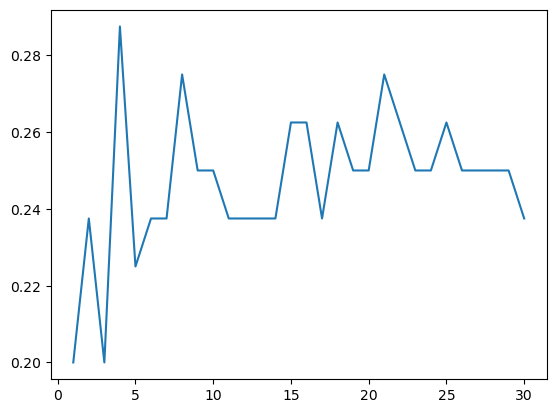

In [93]:
plt.plot(range(1,31),error)